In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
import re
import seaborn as sns
import time
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation
col=['userID','productID','ratings','time']
ronic=pd.read_csv('ratings_Electronics.csv',names=col)
ronic.drop('time',axis=1,inplace=True)
ronic.shape

(7824482, 3)


### 1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)


In [2]:
ronic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userID       object
productID    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


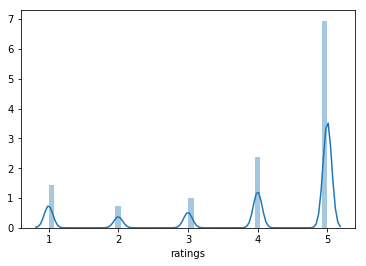

In [3]:
sns.distplot(ronic['ratings'])

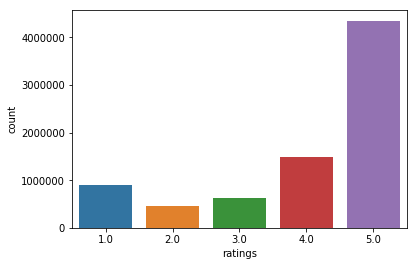

In [4]:
#plotting count of Rating
sns.countplot(data=ronic , x=ronic['ratings'])
plt.show()
#It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times

### Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [5]:
counts1 = ronic['userID'].value_counts()
# print(counts1)
ronic = ronic[ronic['userID'].isin(counts1[counts1 >= 50].index)]
ronic1=ronic
ronic.shape

(125871, 3)

In [6]:
ronic.groupby('userID').count()

,productID,ratings
userID,,
A100UD67AHFODS,116,116
A100WO06OQR8BQ,132,132
A105S56ODHGJEK,68,68
A105TOJ6LTVMBG,71,71
A10AFVU66A79Y1,65,65
A10H24TDLK2VDP,57,57
A10NMELR4KX0J6,96,96
A10O7THJ2O20AG,80,80
A10PEXB6XAQ5XF,107,107


In [7]:
ronic1.drop(['userID','productID'],axis=1,inplace=True)
ronic1.head()

,ratings
94,5.0
118,3.0
177,1.0
178,4.0
492,5.0


 ### Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ronic, test_size = 0.3, random_state=0)
testDF = test_data.copy()
test_data.ronic = np.nan
print(train_data.head(5))

         ratings
6595853      5.0
4738241      1.0
4175596      5.0
3753016      3.0
1734767      4.0


 ### Build Popularity Recommender model.
 

In [9]:
ronic.head()

,ratings
94,5.0
118,3.0
177,1.0
178,4.0
492,5.0


In [10]:
#Converting it to int to do StandardScaler
test_data.ratings=test_data.ratings.astype('int32')

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37762 entries, 6730391 to 975289
Data columns (total 1 columns):
ratings    37762 non-null int32
dtypes: int32(1)
memory usage: 442.5 KB


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ratings_diff =  sc.fit_transform(ronic)          
a = pd.DataFrame(ratings_diff)
a

,0
0,0.695446
1,-1.187545
2,-3.070536
3,-0.246050
4,0.695446
5,0.695446
6,-0.246050
7,0.695446
8,0.695446
9,-3.070536


#### Find the mean for each column  in `ratings_diff` i.e, for each Product

In [13]:
a = a.mean()
a = pd.DataFrame(a)


#### Consider all the mean ratings and find the product with highest mean value and display the top 10 Product IDs.

In [14]:
a.iloc[:,0].argsort()[:-10:-1]

0    0
Name: 0, dtype: int64

In [15]:
col=['userID','productID','ratings','time']
ronic1=pd.read_csv('ratings_Electronics.csv',names=col)
ronic1.drop('time',axis=1,inplace=True)
ronic1.shape


(7824482, 3)

In [16]:
counts1 = ronic1['userID'].value_counts()
# print(counts1)
ronic1 = ronic1[ronic1['userID'].isin(counts1[counts1 >= 50].index)]

ronic1.shape

(125871, 3)

In [17]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ronic1, test_size = 0.3, random_state=0)
testDF = test_data.copy()
test_data.ronic1 = np.nan
print(train_data.head(5))

                 userID   productID  ratings
6595853  A2BYV7S1QP2YIG  B009EAHVTA      5.0
4738241   AB094YABX21WQ  B0056XCEAA      1.0
4175596  A3D0UM4ZD2CMAW  B004I763AW      5.0
3753016   AATWFX0ZZSE6C  B0040NPHMO      3.0
1734767  A1NNMOD9H36Q8E  B0015VW3BM      4.0


In [20]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'userID', 'productID')

KeyError: 'score'

In [ ]:
userID = users[20]
pm.recommend(userID)

In [ ]:
userID = users[7]
pm.recommend(userID)

In [ ]:
###Fill in the code here
userID = users[8]
pm.recommend(userID)

In [ ]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'userID', 'productID')

In [ ]:
#Print the songs for the user in training data
userID = users[5]
user_items = is_model.get_user_items(userID)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % userID)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(userID)

In [ ]:
userID = users[7]
#Fill in the code here
user_items = is_model.get_user_items(userID)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % userID)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(userID)


In [ ]:
is_model.get_similar_items(['B004I763AW'])

In [ ]:
productID = 'B003PNIQCI'
###Fill in the code here
is_model.get_similar_items([productID])

In [ ]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

In [ ]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.2])
    pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

In [ ]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

In [ ]:
testDF = testDF.dropna()
testDF.head()

In [ ]:
ratings = pd.concat([train_data, test_data]).reset_index()
ratings.head()

In [ ]:
# We want the format of ratings matrix to be one row per user and one column per Product. 
#we can pivot ratings_df to get that and call the new variable ratings_matrix.
ratings_matrix =ratings.pivot(index='userID', columns='productID', values='ratings').fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

### Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.

In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns)
preds_df.head()

In [ ]:
user_id = 10
userID = ratings_matrix.iloc[user_id-1, :].name
userID

In [ ]:
preds_df.shape

In [ ]:
sorted_user_predictions = preds_df.iloc[user_id].sort_values(ascending=False)
len(sorted_user_predictions)

In [ ]:
# Get 5 products not used by the user
NewProduct = ratings[ratings.userID != (userID)]

In [ ]:
NewProduct.head(5)

In [ ]:
from scipy.stats import zscore

In [ ]:
from sklearn.cluster import KMeans
ronicz = ronic.apply(zscore)
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5,random_state=1)
  clusters.fit(ronicz)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

In [ ]:
cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(ronicz)

In [ ]:
prediction=cluster.predict(ronicz)
ronicz["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record
ronicz.head(10)

In [ ]:
# Addressing outliers at group level
data = ronicz   
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group
data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(ronicz['GROUP']))

In [ ]:
y = concat_data['GROUP']
x= concat_data[['ratings']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
#Calculating the metrics

from sklearn import metrics
#Predicting the data

predictions = lm.predict( X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error( y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_test, predictions)))

In [ ]:
sns.distplot((y_test-predictions),bins=50);